In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/online_advertising_performance_data.csv')
print(df.head())

   month  day campaign_number user_engagement     banner placement  displays  \
0  April    1          camp 1            High  160 x 600       abc         4   
1  April    1          camp 1            High  160 x 600       def     20170   
2  April    1          camp 1            High  160 x 600       ghi     14701   
3  April    1          camp 1            High  160 x 600       mno    171259   
4  April    1          camp 1             Low  160 x 600       def       552   

       cost  clicks   revenue  post_click_conversions  \
0    0.0060       0    0.0000                       0   
1   26.7824     158   28.9717                      23   
2   27.6304     158   28.9771                      78   
3  216.8750    1796  329.4518                     617   
4    0.0670       1    0.1834                       0   

   post_click_sales_amount  Unnamed: 12  Unnamed: 13  
0                   0.0000          NaN          NaN  
1                1972.4602          NaN          NaN  
2          

What is the overall trend in user engagement throughout the campaign period?

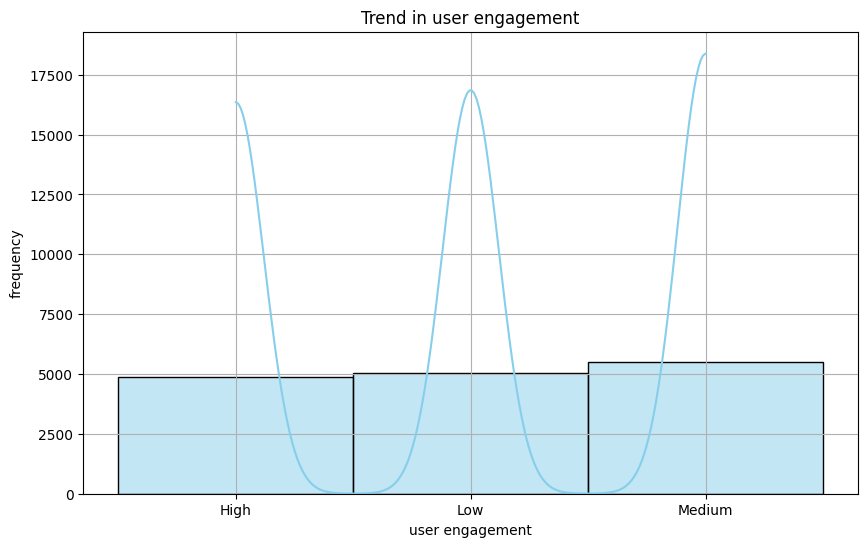

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['user_engagement'], kde=True, color='skyblue', stat='count')
plt.title('Trend in user engagement')
plt.xlabel('user engagement')
plt.ylabel('frequency')
plt.grid(True)
plt.show()


How does the size of the ad (banner) impact the number of clicks generated?

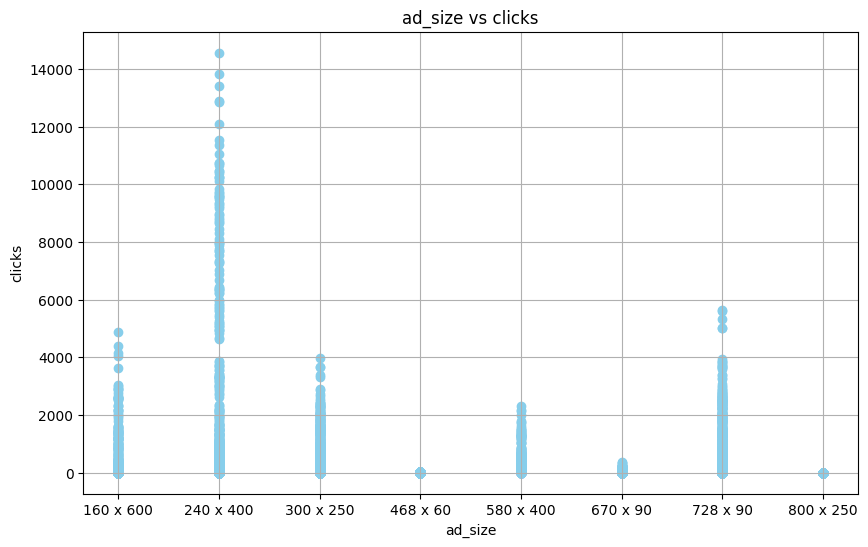

In [ ]:
plt.figure(figsize=(10, 6))
x_point = df['banner']
y_point = df['clicks']
plt.scatter(x_point, y_point, color='skyblue')
plt.title('ad_size vs clicks')
plt.xlabel('ad_size')
plt.ylabel('clicks')
plt.grid(True)
plt.show()


Which publisher spaces (placements) yielded the highest number of displays and clicks?

<ipython-input-6-7d0d7be8a3cd>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['placement'], rotation=45, ha='right')
<ipython-input-6-7d0d7be8a3cd>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df['placement'], rotation=45, ha='right')


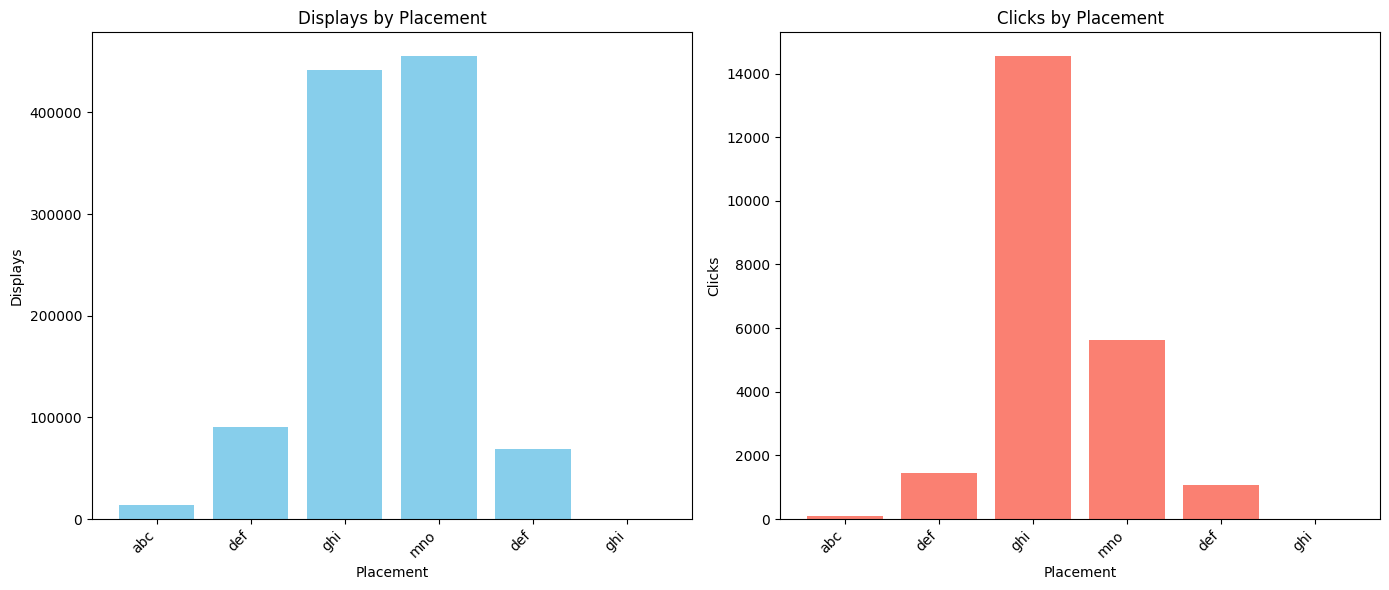

In [ ]:
# Ensure the placements are strings
df['placement'] = df['placement'].astype(str)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.bar(df['placement'], df['displays'], color='skyblue')
ax1.set_xlabel('Placement')
ax1.set_ylabel('Displays')
ax1.set_title('Displays by Placement')
ax1.set_xticklabels(df['placement'], rotation=45, ha='right')

ax2.bar(df['placement'], df['clicks'], color='salmon')
ax2.set_xlabel('Placement')
ax2.set_ylabel('Clicks')
ax2.set_title('Clicks by Placement')
ax2.set_xticklabels(df['placement'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

Is there a correlation between the cost of serving ads and the revenue generated from clicks?

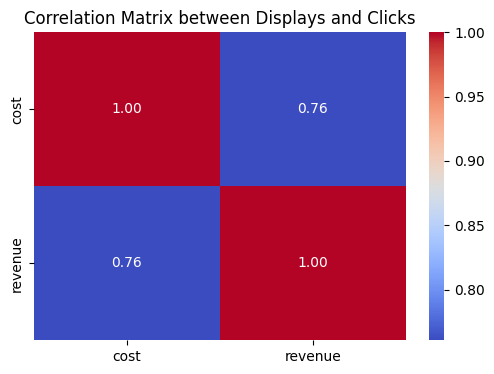

In [ ]:
subset = df[['cost', 'revenue']]
correlation = subset.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Displays and Clicks')
plt.show()

What is the average revenue generated per click for Company X during the campaign period?

In [ ]:
average_revenue = df['revenue'].sum()/df['clicks'].sum()
print("Average revenue per click:", average_revenue)

Average revenue per click: 0.1108233559193802


Which campaigns had the highest post-click conversion rates?

In [ ]:
highest_conversion_campaign = df.groupby('campaign_number')['post_click_conversions'].mean().idxmax()
highest_conversion_rate = df.groupby('campaign_number')['post_click_conversions'].mean().max()

print(f'The campaign with the highest post-click conversion rate is "{highest_conversion_campaign}" with a conversion rate of {highest_conversion_rate:.2f}%')

The campaign with the highest post-click conversion rate is "camp 1" with a conversion rate of 92.06%


Are there any specific trends or patterns in post-click sales amounts over time?

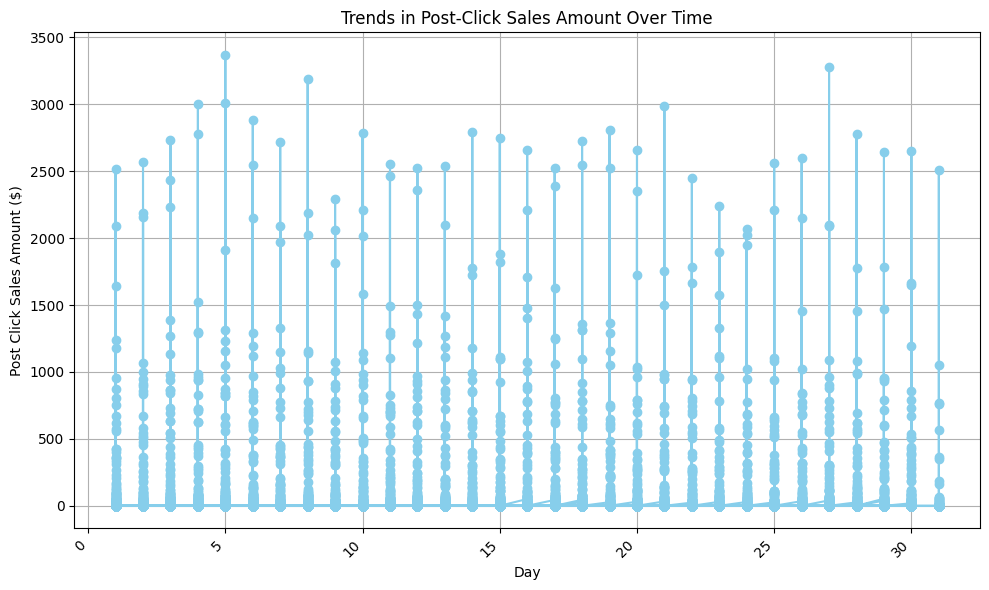

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['day'], df['post_click_conversions'], marker='o', color='skyblue', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Post Click Sales Amount ($)')
plt.title('Trends in Post-Click Sales Amount Over Time')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

How does the level of user engagement vary across different banner sizes?

<ipython-input-11-a03b8eb168a4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='banner', y='user_engagement', data=df, palette='coolwarm')


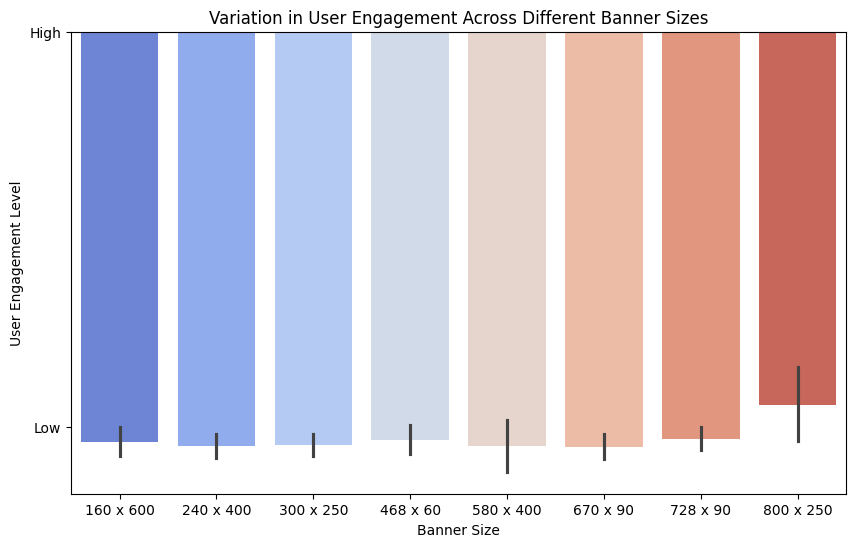

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='banner', y='user_engagement', data=df, palette='coolwarm')
plt.xlabel('Banner Size')
plt.ylabel('User Engagement Level')
plt.title('Variation in User Engagement Across Different Banner Sizes')
plt.show()

Which placement types result in the highest post-click conversion rates?

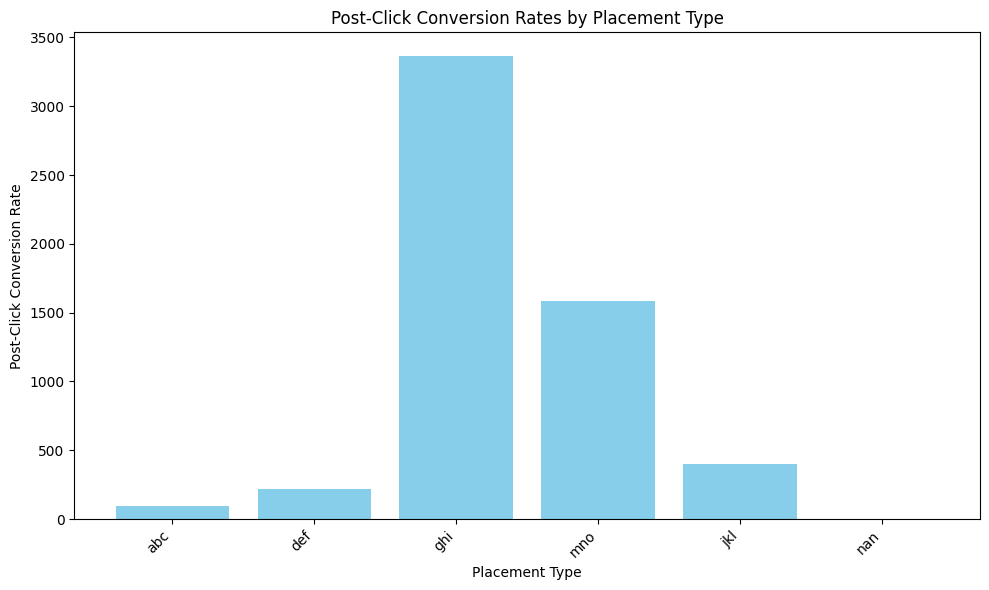

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df['placement'], df['post_click_conversions'], color='skyblue')
plt.xlabel('Placement Type')
plt.ylabel('Post-Click Conversion Rate')
plt.title('Post-Click Conversion Rates by Placement Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Can we identify any seasonal patterns or fluctuations in displays and clicks throughout the campaign period?

<ipython-input-13-cd6ebd842d3f>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['month'], rotation=45, ha='right')
<ipython-input-13-cd6ebd842d3f>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df['month'], rotation=45, ha='right')


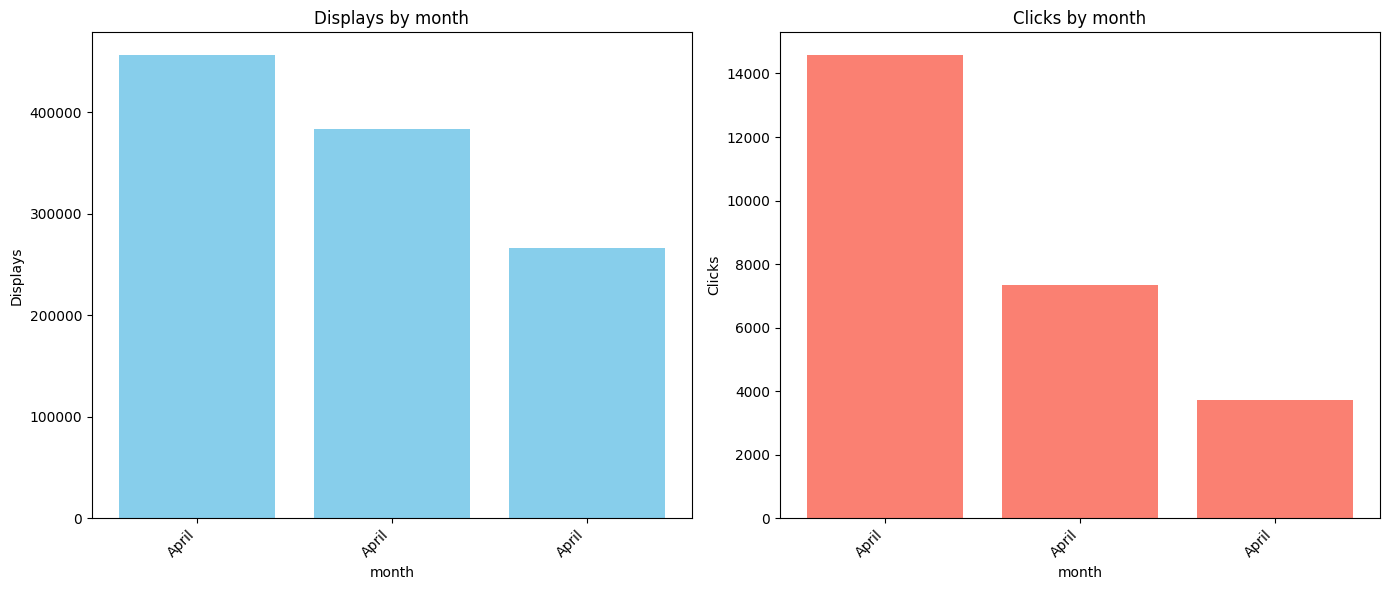

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.bar(df['month'], df['displays'], color='skyblue')
ax1.set_xlabel('month')
ax1.set_ylabel('Displays')
ax1.set_title('Displays by month')
ax1.set_xticklabels(df['month'], rotation=45, ha='right')

ax2.bar(df['month'], df['clicks'], color='salmon')
ax2.set_xlabel('month')
ax2.set_ylabel('Clicks')
ax2.set_title('Clicks by month')
ax2.set_xticklabels(df['month'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

Is there a correlation between user engagement levels and the revenue generated?

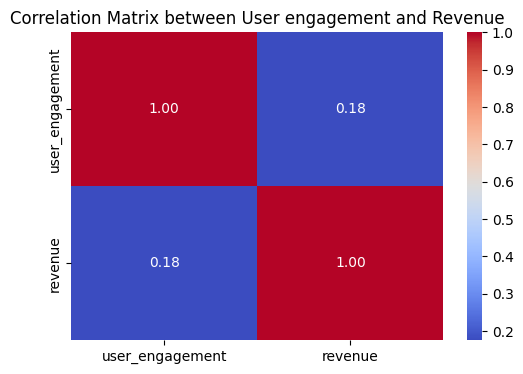

In [ ]:
df.replace({'user_engagement':{'High':1,'Medium':0.5,'Low':0}},inplace=True)
subset = df[['user_engagement', 'revenue']]
correlation = subset.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between User engagement and Revenue')
plt.show()

Are there any outliers in terms of cost, clicks, or revenue that warrant further investigation?

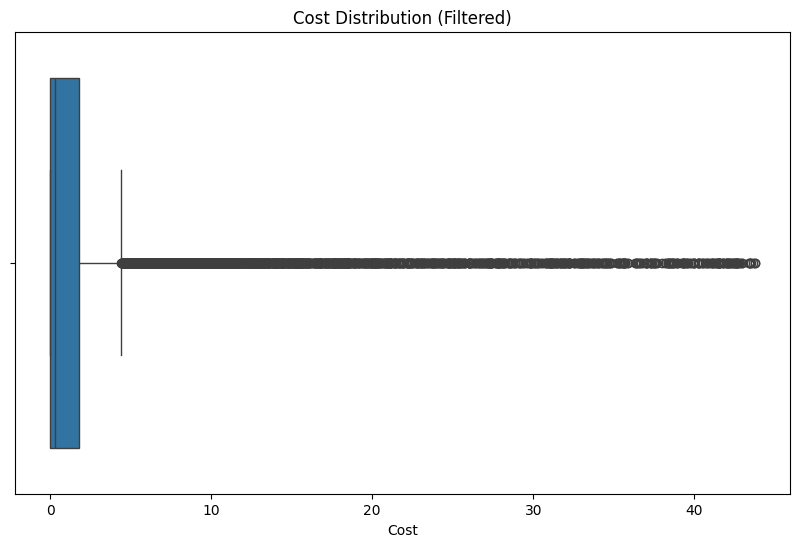

In [ ]:
filtered_df = df[df['cost'] < df['cost'].quantile(0.95)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='cost', data=filtered_df)
plt.title("Cost Distribution (Filtered)")
plt.xlabel("Cost")
plt.show()

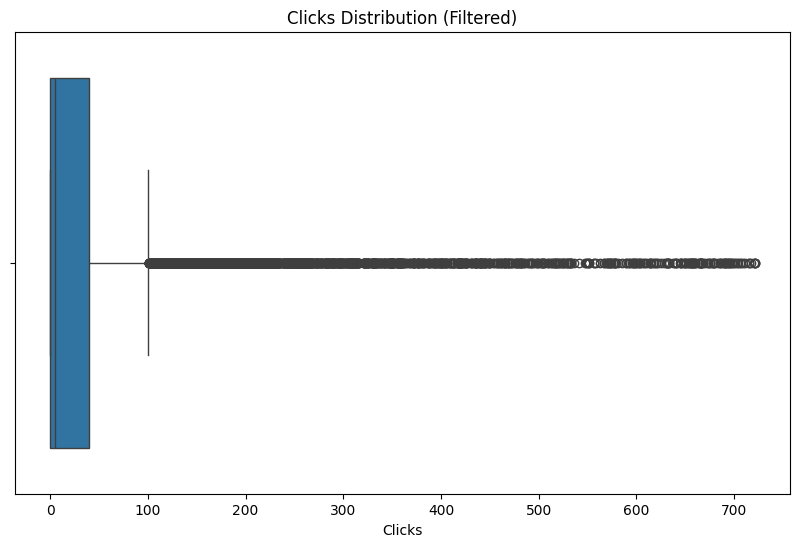

In [ ]:
filtered_df = df[df['clicks'] < df['clicks'].quantile(0.95)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='clicks', data=filtered_df)
plt.title("Clicks Distribution (Filtered)")
plt.xlabel("Clicks")
plt.show()

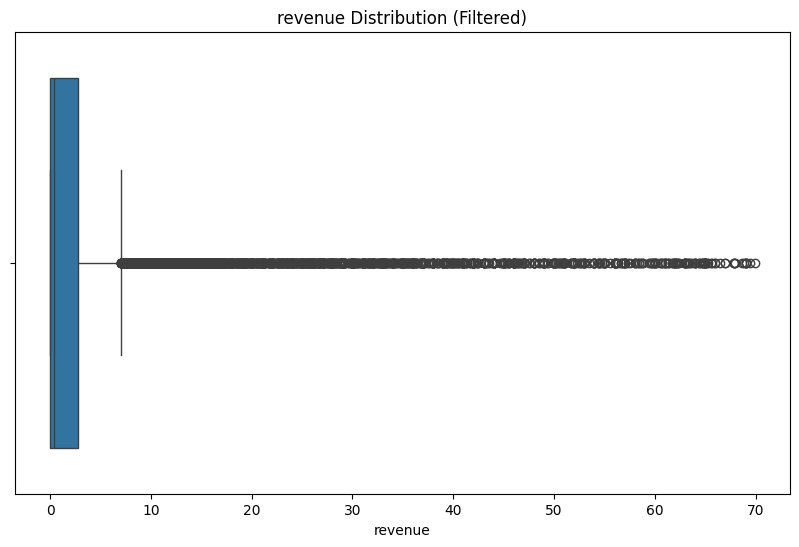

In [ ]:
filtered_df = df[df['revenue'] < df['revenue'].quantile(0.95)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='revenue', data=filtered_df)
plt.title("revenue Distribution (Filtered)")
plt.xlabel("revenue")
plt.show()

How does the effectiveness of campaigns vary based on the size of the ad and placement type?

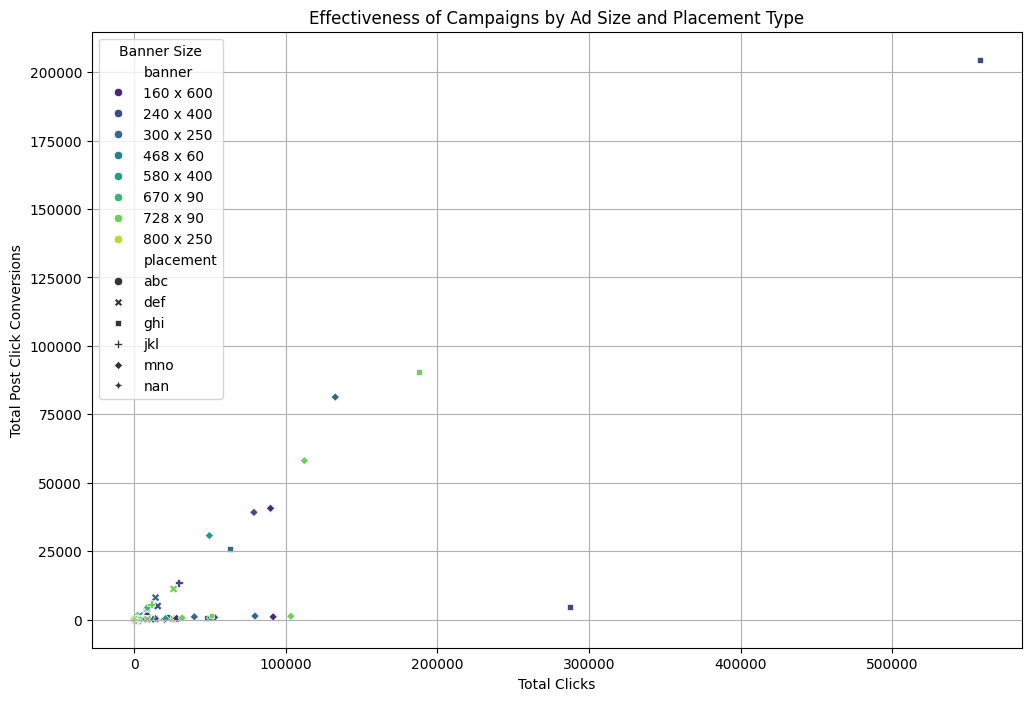

In [ ]:
campaign_effectiveness = df.groupby(['campaign_number', 'banner', 'placement'])[['clicks', 'post_click_conversions']].sum()
campaign_effectiveness['Conversion Rate'] = campaign_effectiveness['post_click_conversions'] / campaign_effectiveness['clicks']
campaign_effectiveness = campaign_effectiveness.reset_index()
plt.figure(figsize=(12, 8))
sns.scatterplot(data=campaign_effectiveness, x='clicks', y='post_click_conversions', hue='banner', style='placement', palette='viridis')
plt.title('Effectiveness of Campaigns by Ad Size and Placement Type')
plt.xlabel('Total Clicks')
plt.ylabel('Total Post Click Conversions')
plt.legend(title='Banner Size')
plt.grid(True)
plt.show()

Are there any specific campaigns or banner sizes that consistently outperform others in terms of ROI?

In [ ]:
df['ROI'] = (df['revenue'] - df['cost']) / df['cost']

campaign_banner_roi = df.groupby(['campaign_number', 'banner'])['ROI'].mean()

high_roi_campaigns = campaign_banner_roi[campaign_banner_roi > campaign_banner_roi.mean()]

print("Campaigns or Banner Sizes with Consistently Higher ROI:")
print(high_roi_campaigns)

Campaigns or Banner Sizes with Consistently Higher ROI:
campaign_number  banner   
camp 1           160 x 600    2.931911
                 240 x 400    1.531187
                 300 x 250    1.171725
                 580 x 400    1.070334
camp 2           240 x 400    0.906611
                 580 x 400    2.113678
camp 3           160 x 600    3.096757
                 580 x 400    2.004255
Name: ROI, dtype: float64


What is the distribution of post-click conversions across different placement types?

<ipython-input-34-293a02556653>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=placement_conversions, x='placement', y='post_click_conversions', palette='viridis')


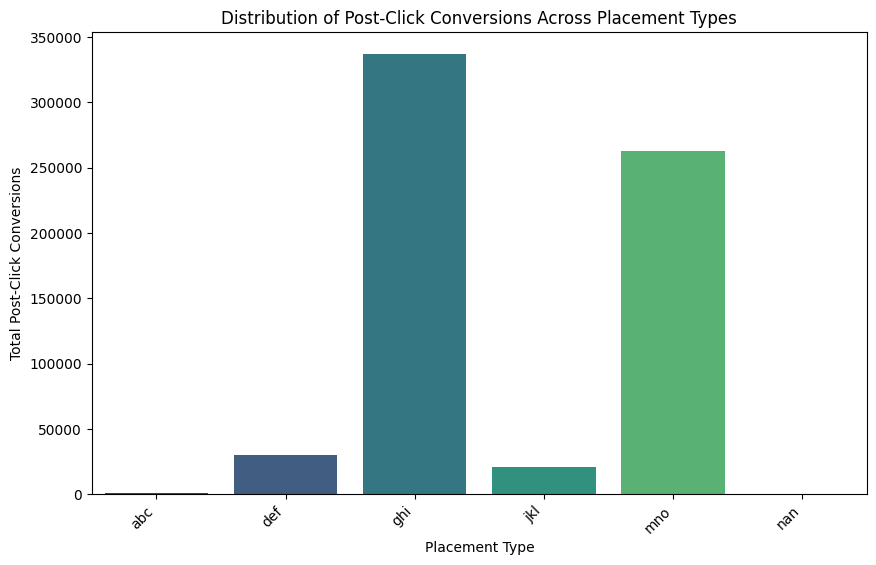

In [ ]:
placement_conversions = df.groupby('placement')['post_click_conversions'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=placement_conversions, x='placement', y='post_click_conversions', palette='viridis')
plt.title('Distribution of Post-Click Conversions Across Placement Types')
plt.xlabel('Placement Type')
plt.ylabel('Total Post-Click Conversions')
plt.xticks(rotation=45, ha='right')
plt.show()

Are there any noticeable differences in user engagement levels between weekdays and weekends?

In [ ]:
df['Day'] = pd.to_datetime(df['day'])
df['Weekday'] = df['Day'].dt.weekday
weekday_engagement = df.groupby('Weekday')['user_engagement'].mean()
print(weekday_engagement)

Weekday
3    0.4951
Name: user_engagement, dtype: float64


How does the cost per click (CPC) vary across different campaigns and banner sizes?

In [ ]:
df['CPC'] = df['cost'] / df['clicks']
campaign_banner_cpc = df.groupby(['campaign_number', 'banner'])['CPC'].mean()
print(campaign_banner_cpc)

campaign_number  banner   
camp 1           160 x 600         NaN
                 240 x 400         NaN
                 300 x 250         NaN
                 468 x 60          NaN
                 580 x 400         NaN
                 670 x 90          NaN
                 728 x 90          NaN
                 800 x 250         NaN
camp 2           160 x 600         NaN
                 240 x 400    0.023859
                 300 x 250         NaN
                 468 x 60          NaN
                 580 x 400    0.013092
                 670 x 90          NaN
                 728 x 90          NaN
                 800 x 250         NaN
camp 3           160 x 600         NaN
                 240 x 400         NaN
                 300 x 250         NaN
                 468 x 60          NaN
                 580 x 400    0.037167
                 670 x 90          NaN
                 728 x 90          NaN
                 800 x 250         NaN
Name: CPC, dtype: float64


Are there any campaigns or placements that are particularly cost-effective in terms of generating post-click conversions?

<ipython-input-43-071d5b8de556>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='placement', y='Cost_per_Conversion', palette='viridis')


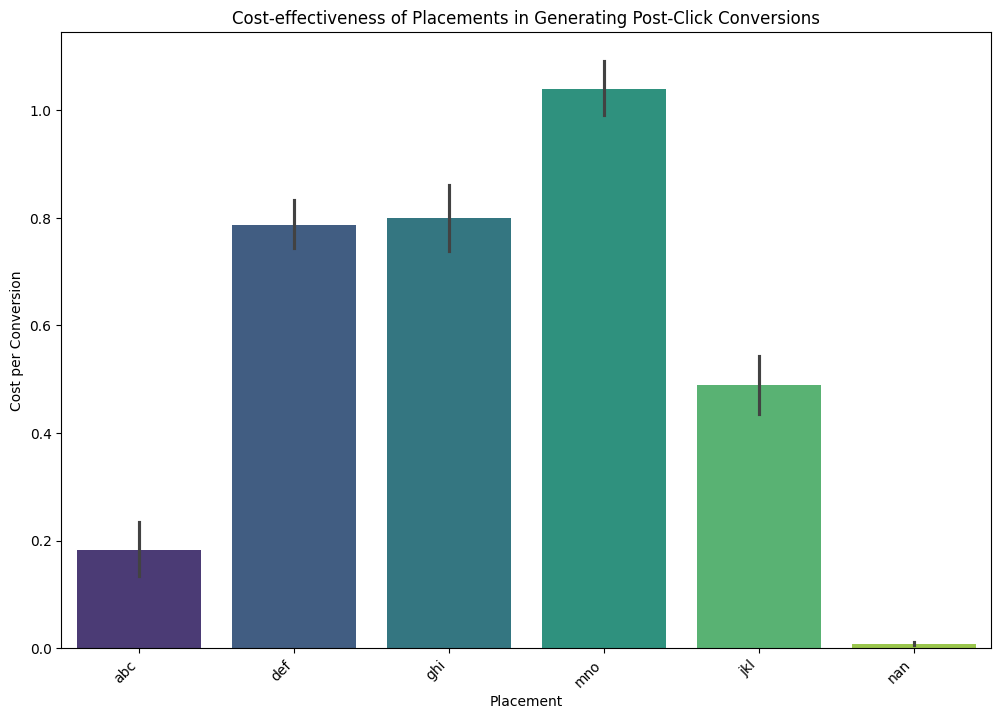

In [ ]:
df['Cost_per_Conversion'] = df['cost'] / df['post_click_conversions']

plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='placement', y='Cost_per_Conversion', palette='viridis')
plt.title('Cost-effectiveness of Placements in Generating Post-Click Conversions')
plt.xlabel('Placement')
plt.ylabel('Cost per Conversion')
plt.xticks(rotation=45, ha='right')
plt.show()

Can we identify any trends or patterns in post-click conversion rates based on the day of the week? give code without comments

<ipython-input-44-d5423444e8db>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Weekday', y='post_click_conversions', palette='viridis')


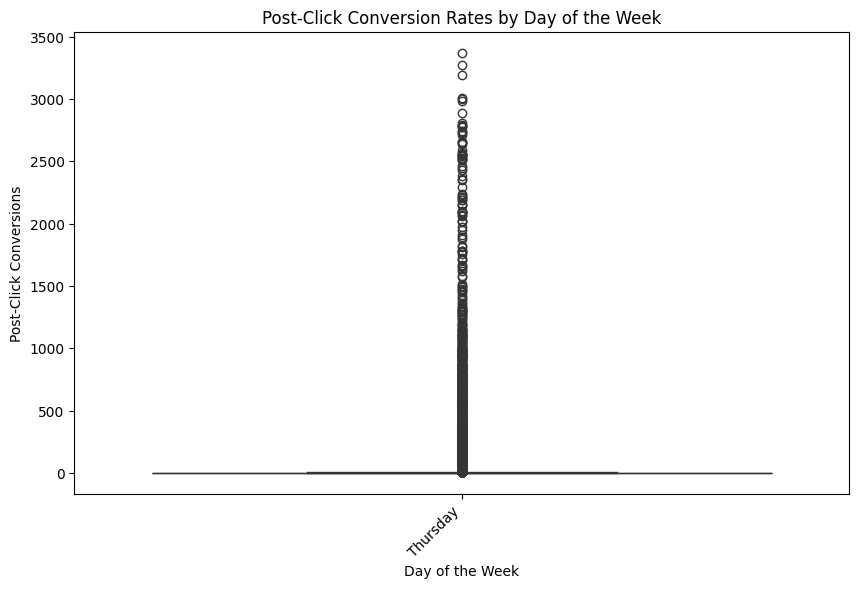

In [ ]:
df['Day'] = pd.to_datetime(df['Day'])
df['Weekday'] = df['Day'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Weekday', y='post_click_conversions', palette='viridis')
plt.title('Post-Click Conversion Rates by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Post-Click Conversions')
plt.xticks(rotation=45, ha='right')
plt.show()

How does the effectiveness of campaigns vary throughout different user engagement types in terms of post-click conversions?

In [ ]:
campaign_engagement_effectiveness = df.groupby(['campaign_number', 'user_engagement'])['post_click_conversions'].sum()

print(campaign_engagement_effectiveness)

campaign_number  user_engagement
camp 1           0.0                   595
                 0.5                 15249
                 1.0                617241
camp 2           0.0                   844
                 0.5                 12923
camp 3           0.0                   150
                 0.5                  1085
                 1.0                  3681
Name: post_click_conversions, dtype: int64
